<IPython.core.display.Javascript object>


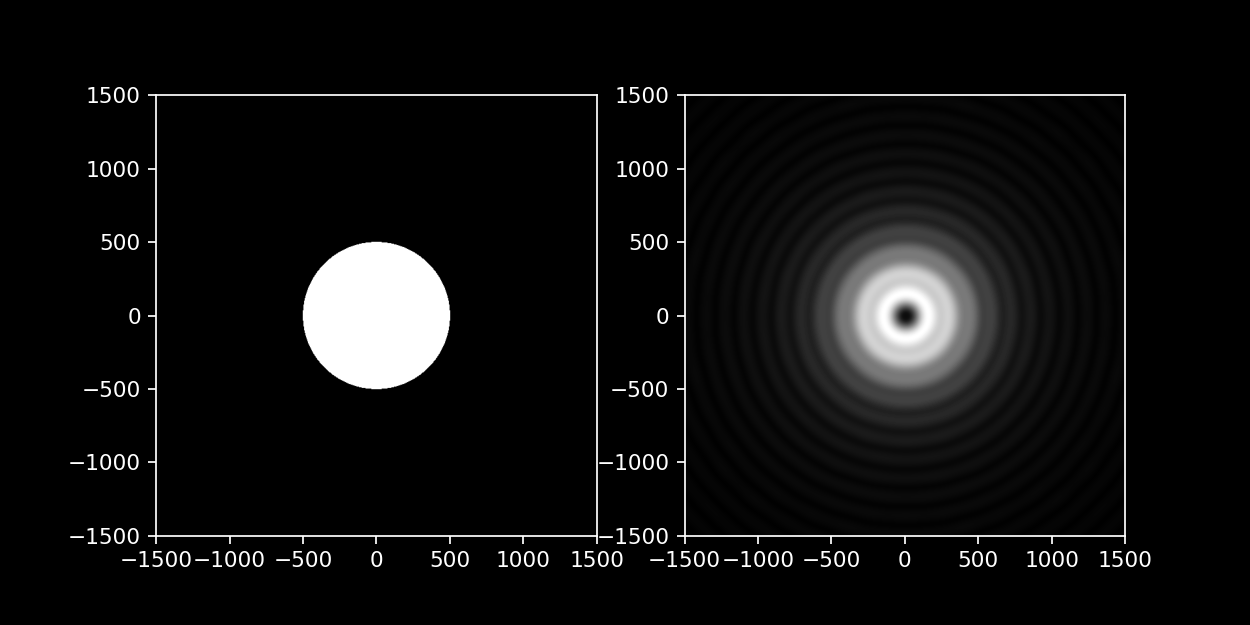

interactive(children=(IntSlider(value=40000, description='d', max=400000, min=40000, step=20000), Output()), _…

In [2]:
#Fresnel Difraction - Figura 4.17
import pylab as pl
import numpy as np
from math import pi
from numpy.fft import fft2, fftshift
from ipywidgets import interact
%matplotlib ipympl
pl.style.use('dark_background')
fig=pl.figure(figsize=(8,4))
lbd=0.632 #wavelength= 0.632 micron
w=500. 
#
X, Y = np.mgrid[-9000:9000:4096j, -9000:9000:4096j]
Pho2=X**2+Y**2
Ap=Pho2<w**2
d=98700.
@interact(d=(40000, 400000, 20000))
def Plot(d=40000.):
    N=w**2/(lbd*d)
    print(N,"Fresnel zones")
    QPh=np.exp(1.j *pi*Pho2/(lbd*d))
    I=fftshift(fft2(Ap*QPh))
    px_ap=2048/9000
    px_sc=2048/(0.5*px_ap*lbd*d) #Dimensions at the observation screen
    S_p=int(1500*px_sc)
    #plotting
    pl.subplot(121)
    pl.imshow(Ap[2048-int(1500*px_ap):2048+int(1500*px_ap),2048-int(1500*px_ap):2048+int(1500*px_ap)],extent=[-1500,1500,-1500,1500],cmap="gray")
    pl.subplot(122)
    pl.imshow(np.abs(I)[2048-S_p:2048+S_p,2048-S_p:2048+S_p],extent=[-1500,1500,-1500,1500],cmap="gray")
    pl.draw()
    return None